# A brief introduction to bond-calculus and $\mathcal{LBUC}$

## The basics

Import relevant libraries

In [1]:
%display latex

In [2]:
from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *

Load bond-calculus model file

In [3]:
m = BondModel("./models/WhelksAndLobsters.bond")

Running cmd: 'load "models/WhelksAndLobsters.bond"' ...


Create process with given initial concentrations and affinity network

In [4]:
p = m.process("[1.0 .. 1.2] Whelk || [4 .. 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)"); p

BondProcess('[1.0 .. 1.2] Whelk || [4 .. 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)', <ulbc.bondcalculus.BondModel object at 0x7f5d1c4ec110>)

Export system of odes (question marks on values denote intervals)

In [5]:
s = p.as_system; s

Running cmd: 'savesage "[1.0 .. 1.2] Whelk || [4 .. 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-dgcnfoto.py"' ...
System(Multivariate Polynomial Ring in x0, x1 over Real Interval Field with 53 bits of precision, (x0, x1), [5.?, 1.?], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), {'Lobster': x0, 'Whelk': x1}
varmap = bidict({'Lobster': x0, 'Whelk': x1})


System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1}))

## Working with ODE systems

Systems of ODEs are represented in Python as System objects. There is at least some class-level documentation saying what you can do with them.

In [6]:
help(s)

Help on BondSystem in module ulbc.bondcalculus object:

class BondSystem(System)
 |  BondSystem(R, x: tuple, y0: tuple, y: tuple, affinity_network: str, model: Union[ForwardRef('BondModel'), NoneType] = None, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
 |  
 |  Method resolution order:
 |      BondSystem
 |      System
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, R, x: tuple, y0: tuple, y: tuple, affinity_network: str, model: Union[ForwardRef('BondModel'), NoneType] = None, varmap: Union[dict, NoneType] = None, y0_ctx: Union[tuple, NoneType] = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  process_from_state(self, state: List[Any]) -> 'BondProcess'
 |  
 |  with_y0(self, y0, y0_ctx: Union[tuple, NoneType] = None)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  load_from_script(filename: str, model: Union[Forwa

They define a sage variable for each dimension of the system (extracted from the bond-calculus model)

In [7]:
s.x

(x0, x1)

In [8]:
s.varmap

bidict({'Lobster': x0, 'Whelk': x1})

They also include the extracted ODEs

In [9]:
s.y[1]

0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1

In [10]:
s.y[0]

-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0

## Streamline plot

We can, for example, produce a streamline plot and mark on the initial condition (box):

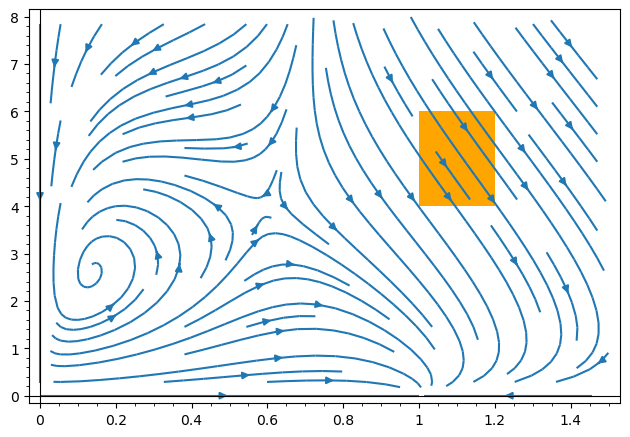

In [11]:
out = s.streamline_plot((s.v('Whelk'), 0, 1.5), (s.v('Lobster'), 0, 8))
out += polygon([(s.y0[1].lower(), s.y0[0].lower()),
            (s.y0[1].lower(), s.y0[0].upper()),
            (s.y0[1].upper(), s.y0[0].upper()),
            (s.y0[1].upper(), s.y0[0].lower())],
              color='orange')
out.set_aspect_ratio(1/8)
out

If you look at the sourcecode of System.streamline_plot you will see this simply wraps the plotting methods of the Sage computer algebra system (http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html).

If you prefer you could also use pyplot or any other plotting library with a little extra work.

## Other plots

You can use any other Sage plotting methods to produce graphs or indeed write arbitrary Python code (and any of the scientific/numerical python libraries) to produce more complex plots.

In many cases it might be necessary to cast the system of odes to replace intervals with normal floating point numbers (Sage Reals).

In [12]:
# Cast interval ODEs to normal floating point numbers
RQ, xq = RR['x0, x1'].objgens()
Qodes = [RQ(yi) for yi in s.y]
xq, Qodes

((x0, x1),
 [-2.00000000000000*x0*x1^2 - 0.0500000000000000*x0^2 + 1.60000000000000*x0*x1 - 0.0500000000000000*x0,
  0.300000000000000*x0*x1^2 - 0.240000000000000*x0*x1 - 0.600000000000000*x1^2 + 0.600000000000000*x1])

Then we can solve the ODEs (for a given point initial condition $\mathbf{x}_0 = (1.1, 5)$) using Sage's desolve_odeint (http://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html#sage.calculus.desolvers.desolve_odeint)

In [13]:
timepoints = srange(0,10,0.1)
initials = [1.1, 5]

In [14]:
sln = desolve_odeint(Qodes, initials, timepoints, list(xq))

The result can then be plotted

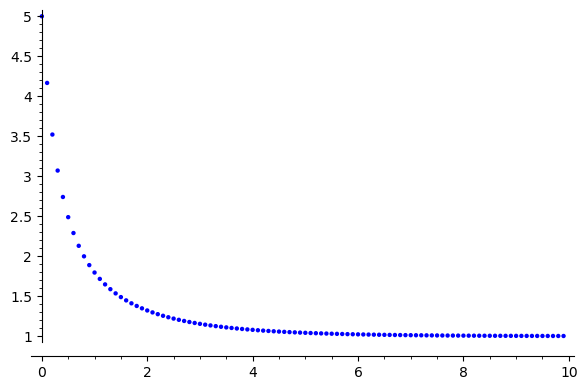

In [15]:
points(zip(timepoints, [y[1] for y in sln]))

A little more complicatedly, you can also use scipy's solve_ivp

In [16]:
from scipy.integrate import solve_ivp
from ulbc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

# Make callable function for odes (and jacobian matrix)
f = vec_to_numpy(RQ, Qodes)
jac = mat_to_numpy(RQ, sage.jacobian(Qodes, RQ.gens()))
sln = solve_ivp(f,
                (0, 10),
                initials,
                method='LSODA',
                jac=jac,
                vectorized=True,
                dense_output=True)

And then the solution may be plotted as a continuous function

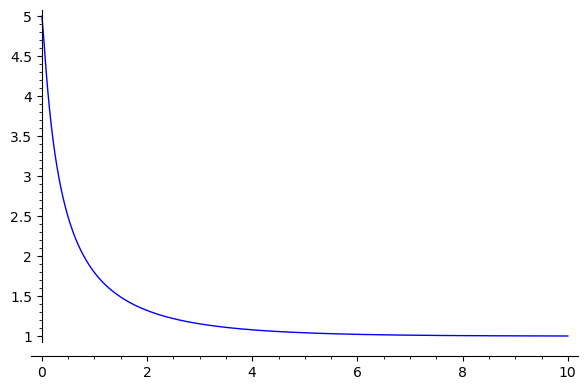

In [17]:
plot(lambda t: sln.sol(t)[1], (0, 10))

## Flowstar Reachability

You can also use the flow* validated integrator to compute sound enclosures of the trajectories of a system.

In [18]:
r = s.reach(5, order=5, step=(0.01, 0.2),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5)

calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


var_id_x = 1
var_id_y = 0


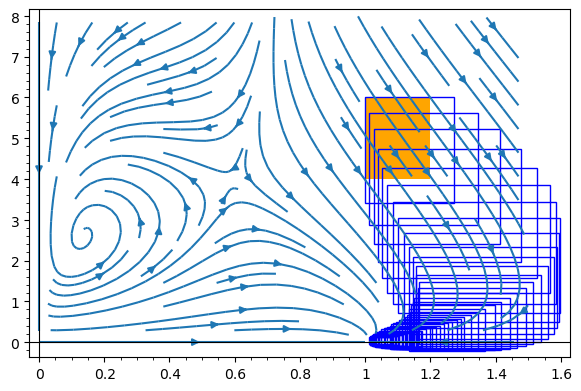

In [19]:
out1 = out + r.sage_interval_plot('x1', 'x0')
out1.set_aspect_ratio(1/8)
out1

## $\mathcal{LBUC}$ Formulae

Finally, you can check the truth of $\mathcal{LBUC}$ formulae (plotted over time of checking)

In [20]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 > 0.2); P

Atomic(Lobster^2 + (Whelk - 1)^2 > 0.200000000000000)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 3.99 seconds
Computed 125 flowpipes in 3.991026341999941 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5cf6a1d5f0>, 0 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.60 seconds
roots = [[0.76843267302404838 .. 2.9316460837390537]]
domain = [0.0000000000000000 .. 10.000000000000002]
roots = [[0.7684326730240483

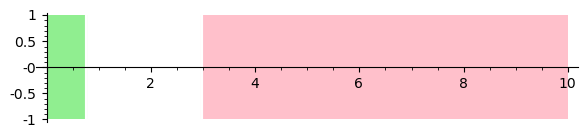

In [21]:
P.signal_for_system(s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5).plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 4.11 seconds
Computed 145 flowpipes in 4.110397713000111 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5cf6a1db90>, 0 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.61 seconds
roots = [[0.76843267302404838 .. 2.9316460837390537]]
domain = [0.0000000000000000 .. 12.000000000000002]
roots = [[0.7684326730240483

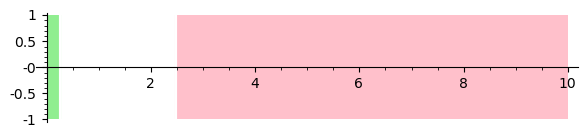

In [22]:
F(RIF(0.5, 2), P).signal_for_system(s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5).plot()

This also has various magical 'make everything faster/better' flags you might want to experiment with

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 4.87 seconds
Computed 145 flowpipes in 4.871060078000141 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5cf6a1d8c0>, 0 symbolic_composition=False, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 12.001000000000002], [[0.50000000000000000 .. 12.001000000000002]]))
fprime = 0
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.67 seconds
roots = [[0.76843267302404838 .. 2.93164608

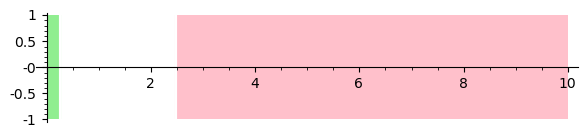

In [23]:
F(RIF(0.5, 2), P).signal_for_system(s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    use_masks=True).plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 4.48 seconds
Computed 145 flowpipes in 4.476936644000034 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5cf6a1d6e0>, 0 symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 5.41 seconds
roots = [[0.71755595465727350 .. 2.3520333237477234], [2.4461257129884055 .. 2.4486354504129451]]
domain = [0.0000000000000000 .. 12.000

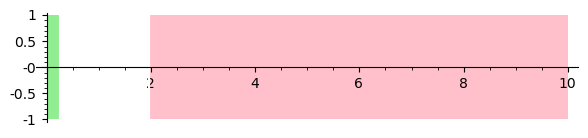

In [24]:
F(RIF(0.5, 2), P).signal_for_system(s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    symbolic_composition=True).plot()

calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
contexts = ['[4.0..6.0]', '[0.9999999999999999..1.2000000000000004]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 145 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5cf6a1db90>, 0 symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001

top-level root detection: 1 items in 1.03 seconds
roots = [[1.7557679641849925 .. 1.7724205637563935], [1.7830270341000320 .. 2.0622269437520582]]
domain = [0.0000000000000000 .. 12.000000000000000]
roots = [[1.7557679641849925 .. 1.7724205637563935], 
 [1.7830270341000320 .. 2.0622269437520582]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.7557679641849925 .. 1.7724205637563935], 
 [1.7830270341000320 .. 2.0622269437520582]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 1.51 seconds
roots = [[1.3800194946902559 .. 1.3947940686105276], [1.4449191361428932 .. 2.2554311970825017]]
domain = [0.0000000000000000 .. 12.000000000000000]
roots = [[1.3800194946902559 .. 1.3947940686105276], 
 [1.4449191361428932 .. 2.2554311970825017]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.3800194946902559 .. 1.3947940686105276], 
 [1.4449191361428932 .. 2.2554311970825017]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 1.07 seconds
roots = [[1.4650386916708812 .. 1.4826141837607290], [1.4899336924920796 .. 1.9444764661636993]]
domain = [0.0000000000000000 .. 12.000000000000000]
roots = [[1.4650386916708812 .. 1.4826141837607290], 
 [1.4899336924920796 .. 1.9444764661636993]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.4650386916708812 .. 1.4826141837607290], 
 [1.4899336924920796 .. 1.9444764661636993]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

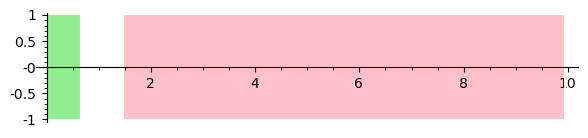

In [25]:
F(RIF(0.5, 2), P).context_signal_for_system(s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    use_masks=True,
    symbolic_composition=True).refined_signal(2).plot()

## Parameter exploration

Context signals can be use to explore the behaviour of the system over a range of different parameter values. For this you need a property that is only true for some initial conditions such as 

In [26]:
prop = G(1, F(RIF(0.5, 2), P))

Then you can form a context signal for the proposition

In [27]:
csig = prop.context_signal_for_system(s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    use_masks=True,
    symbolic_composition=True)

calling reach with y0 = ['[4.0000000000000000 .. 6.0000000000000000]', '[0.99999999999999988 .. 1.2000000000000004]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x0, x1]
C = [4.0..6.0]
C = [0.9999999999999999..1.2000000000000004]
contexts = ['[4.0..6.0]', '[0.9999999999999999..1.2000000000000004]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 156 flowpipes in 1.430511474609375e-06 sec
PolyObserver(x0^2 + x1^2 - 2*x1 + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5cf6a1db90>, 0 symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001

Now you can generate a histogram to explore the truth value of the proposition over different regions of the unknown initial conditions

self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 12.001000000000000], [[0.50000000000000000 .. 12.001000000000000]]))
var_names = [b'local_t', b'x0', b'x1']
res = b''
fprime = 
self.reach.vars = [x0, x1]
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.29 seconds
roots = [[1.3947824244505306 .. 1.3947940686105276], [1.4664988852193465 .. 1.4

top-level root detection: 1 items in 1.93 seconds
roots = [[1.7557679641849925 .. 1.7724205637563935], [1.7830270341000320 .. 2.0622269437520582]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.7557679641849925 .. 1.7724205637563935], 
 [1.7830270341000320 .. 2.0622269437520582]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.7557679641849925 .. 1.7724205637563935], 
 [1.7830270341000320 .. 2.0622269437520582]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 1.30 seconds
roots = [[1.9245904507690485 .. 2.0696138259409854]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.9245904507690485 .. 2.0696138259409854]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.9245904507690485 .. 2.0696138259409854]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.17 seconds
roots = [[1.8287171105224169 .. 1.9656248170868365]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.8287171105224169 .. 1.9656248170868365]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.8287171105224169 .. 1.9656248170868365]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.36 seconds
roots = [[1.5626505258882743 .. 1.5792163104259505], [1.5901271825167413 .. 1.8690226904216150]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.5626505258882743 .. 1.5792163104259505], 
 [1.5901271825167413 .. 1.8690226904216150]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.5626505258882743 .. 1.5792163104259505], 
 [1.5901271825167413 .. 1.8690226904216150]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 1.33 seconds
roots = [[1.7305226221074927 .. 1.8797723282323893]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.7305226221074927 .. 1.8797723282323893]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.7305226221074927 .. 1.8797723282323893]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 12.001000000000000], [[0.50000000000000000 .. 12.001000000000000]]))
var_names = [b'local_t', b'x0', b'x1']
res = b''
fprime = 
self.reach.vars = [x0, x1]
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.24 seconds
roots = [[1.3149576002921561 .. 1.8526821387576494]]
domain = [0.00000000000000

top-level root detection: 1 items in 1.26 seconds
roots = [[1.9414160941444382 .. 2.1194369759728980]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.9414160941444382 .. 2.1194369759728980]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.9414160941444382 .. 2.1194369759728980]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.02 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.26 seconds
roots = [[1.9460745418246430 .. 2.1840769674819672]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.9460745418246430 .. 2.1840769674819672]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.9460745418246430 .. 2.1840769674819672]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.51 seconds
roots = [[1.4650386916708812 .. 1.4826141837607290], [1.4899336924920796 .. 1.9444764661636993]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.4650386916708812 .. 1.4826141837607290], 
 [1.4899336924920796 .. 1.9444764661636993]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.4650386916708812 .. 1.4826141837607290], 
 [1.4899336924920796 .. 1.9444764661636993]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 1.40 seconds
roots = [[1.4452818188429756 .. 1.8059417988481382]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.4452818188429756 .. 1.8059417988481382]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.4452818188429756 .. 1.8059417988481382]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.23 seconds
roots = [[1.3149576002921561 .. 1.8690226904216150]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.3149576002921561 .. 1.8690226904216150]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.3149576002921561 .. 1.8690226904216150]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7fc757754410>,  symbolic_composition=True, tentative_unpreco

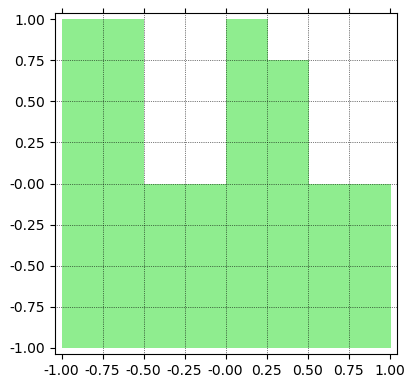

In [28]:
csig.plot_histogram2d(3)

In [28]:
dir(csig)

['F',
 'G',
 'U',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_children',
 '_domain',
 '_signal',
 '_space_domain',
 'children',
 'domain',
 'histogram2d',
 'plot_histogram2d',
 'refined_signal',
 'signal',
 'signal_map',
 'signal_zip_with',
 'space_domain',
 'sub_space_domains',
 'to_domain',
 'to_mask_and',
 'to_mask_or']

In [29]:
csig.histogram2d(3)

self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 12.001000000000000], [[0.50000000000000000 .. 12.001000000000000]]))
var_names = [b'local_t', b'x0', b'x1']
res = b''
fprime = 
self.reach.vars = [x0, x1]
symbolic_composition=True, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.56 seconds
roots = [[1.3947824244505306 .. 1.3947940686105276], [1.4664988852193465 .. 1.4

top-level root detection: 1 items in 1.11 seconds
roots = [[1.9341192964042961 .. 2.2771786879649696]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.9341192964042961 .. 2.2771786879649696]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.9341192964042961 .. 2.2771786879649696]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.91 seconds
roots = [[1.8400546554489298 .. 1.9943796558464917]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.8400546554489298 .. 1.9943796558464917]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.8400546554489298 .. 1.9943796558464917]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.89 seconds
roots = [[1.9143201066183439 .. 2.0622269437520582]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.9143201066183439 .. 2.0622269437520582]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.9143201066183439 .. 2.0622269437520582]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.26 seconds
roots = [[1.2423789927300066 .. 1.9656248170868365]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.2423789927300066 .. 1.9656248170868365]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.2423789927300066 .. 1.9656248170868365]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.95 seconds
roots = [[1.3149576002921561 .. 1.8690226904216150]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.3149576002921561 .. 1.8690226904216150]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.3149576002921561 .. 1.8690226904216150]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.92 seconds
roots = [[1.5680203442762679 .. 1.5792163104259505], [1.5925404978721666 .. 1.8547943087285926]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.5680203442762679 .. 1.5792163104259505], 
 [1.5925404978721666 .. 1.8547943087285926]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.5680203442762679 .. 1.5792163104259505], 
 [1.5925404978721666 .. 1.8547943087285926]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 1.12 seconds
roots = [[1.6671612666436155 .. 1.6758184370911720], [1.7351759213117212 .. 2.2554311970825017]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.6671612666436155 .. 1.6758184370911720], 
 [1.7351759213117212 .. 2.2554311970825017]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.6671612666436155 .. 1.6758184370911720], 
 [1.7351759213117212 .. 2.2554311970825017]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.000

top-level root detection: 1 items in 0.85 seconds
roots = [[1.8542086667577843 .. 2.0170524301242763]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.8542086667577843 .. 2.0170524301242763]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.8542086667577843 .. 2.0170524301242763]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.92 seconds
roots = [[1.8340698457321380 .. 2.0622269437520582]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.8340698457321380 .. 2.0622269437520582]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.8340698457321380 .. 2.0622269437520582]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 1.00 seconds
roots = [[1.3761587396449868 .. 1.9656248170868365]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.3761587396449868 .. 1.9656248170868365]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.3761587396449868 .. 1.9656248170868365]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.91 seconds
roots = [[1.3149576002921561 .. 1.8319592956001647]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.3149576002921561 .. 1.8319592956001647]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.3149576002921561 .. 1.8319592956001647]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

top-level root detection: 1 items in 0.99 seconds
roots = [[1.3668421125180452 .. 1.8202740651763667]]
domain = [0.0000000000000000 .. 13.000000000000000]
roots = [[1.3668421125180452 .. 1.8202740651763667]]
seg_domain = [0.50000000000000000 .. 12.001000000000000]
roots = [[1.3668421125180452 .. 1.8202740651763667]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x0, x1]
var_names = [b'local_t', b'x0', b'x1']
res = b'(([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([0.7999999999 , 0.8000000001]) + ([-2.0000000000 , -2.0000000000] * x1) + ([1.0000000000 , 1.0000000000] * x1^2) + ([1.0000000000 , 1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f5cf6a1db90>,  symbolic_composition=True, tentative_unpreco

[1 1 1 1|1 1 1 1]
[1 1 1 1|1 1 1 1]
[1 1 1 1|1 1 1 1]
[1 1 1 1|1 1 1 1]
[-------+-------]
[1 1 0 0|1 1 0 0]
[1 1 0 0|1 1 0 0]
[1 1 0 0|1 1 0 0]
[1 1 0 0|1 0 0 0]

In [30]:
csig.signal

Signal([0.0000000000000000 .. 10.000000000000000], [([0.94863545041294505 .. 9.0009999999999995], False)], mask=Mask([0.0000000000000000 .. 10.000000000000000], [[0.0000000000000000 .. 9.0009999999999995]]))

In [31]:
list(csig.children)

[ContextSignal([0 .. 13], <...>, children=[[-1 .. 0], [-1 .. 0]]),
 ContextSignal([0 .. 13], <...>, children=[[-1 .. 0], [0 .. 1]]),
 ContextSignal([0 .. 13], <...>, children=[[0 .. 1], [-1 .. 0]]),
 ContextSignal([0 .. 13], <...>, children=[[0 .. 1], [0 .. 1]])]

In [32]:
list(csig.children)[0].signal

Signal([0.0000000000000000 .. 10.000000000000000], [([0.85203332374772333 .. 9.0009999999999995], False)], mask=Mask([0.0000000000000000 .. 10.000000000000000], [[0.0000000000000000 .. 9.0009999999999995]]))

In [33]:
[x.str(style='brackets') for x in list(csig.children)[0].space_domain]

['[-1.0000000000000000 .. 0.0000000000000000]',
 '[-1.0000000000000000 .. 0.0000000000000000]']

In [34]:
res = []

for c1 in csig.children:
    for c2 in c1.children:
        res.append((c2.space_domain, c2.signal(0)))

In [35]:
res

[([-1.?, -1.?], True),
 ([-1.?, -1.?], True),
 ([-1.?, -1.?], True),
 ([-1.?, -1.?], True),
 ([-1.?, 1.?], True),
 ([-1.?, 1.?], None),
 ([-1.?, 1.?], True),
 ([-1.?, 1.?], None),
 ([1.?, -1.?], True),
 ([1.?, -1.?], True),
 ([1.?, -1.?], True),
 ([1.?, -1.?], True),
 ([1.?, 1.?], None),
 ([1.?, 1.?], None),
 ([1.?, 1.?], None),
 ([1.?, 1.?], None)]